# housing price prediction 
## by : Hisham Ibrahem Hindawy

> [GitHub](https://github.com/hishamim)   <br />
> [Facebook](https://www.facebook.com/profile.php?id=61553103880135)   <br />
> [youtube](https://www.youtube.com/@HishamIbrahem1)   <br />

# Outline
- <a href='#1'>1. Packages  </a> 
- <a href='#2'>2. Data</a>
    - <a href='#1.1'>2.1. loading data </a> <br>
    - <a href='#1.1'>2.2. Data overview</a> <br>
        head(), sample(), info(), describe(), nunique()
- <a href='#3'>3. Data Manipulation</a> <br>
    fix the wrong data type columns <br>
    dropna ( is a samll amount ) <br>
    change/correct the colmun name or cell content ( may create new columns )<br>
    
- <a href='#4'>4. Exploratory Data Analysis</a><br> 
    - <a href='#4.1'>4.1. univariate visualization </a><br>
            - <a href='#4.1.1'>4.1.1. univariate visualization numerical columns </a><br>
            - <a href='#4.1.2'>4.1.2. univariate visualization categorcal columns </a>
    - <a href='#4.2'>4.2. bivariate visualization </a>
    - <a href='#4.3'>4.3. multivariate visualization </a>
    - <a href='#4.4'>4.4. Correlation Matrix</a>
    
- <a href='#5'>5. Data preprocessing</a> <br>
    - <a href='#5.1'>5.1. features extraction </a><br>
           add new columns if needed<br>
           remove columns if needed<br>
    - <a href='#5.2'>5.2. featurs selection </a>
    
    split featrures columns and target column <br>
        use label encoder for binary categorical coulmns ( yes/no, male/female ,....)<br>
        split numerical coulmns and categorical columns <br>
        split data x_trian, x_test , y_train, y_test<br>
        make a pipeline as known <br>
    

- <a href='#6'>6. Model Building</a> <br>
    Evaluation Metrics : ...........
    - <a href='#6.1'>6.1. Baseline Model </a>
    - <a href='#6.2'>6.2. model 2 </a>
    - <a href='#6.3'>6.3. model 3 </a>
    - <a href='#6.4'>6.4. model 4 </a>
    - <a href='#6.5'>6.5. model 5 </a>
    - <a href='#6.6'>6.6. model 5 </a>
    - <a href='#6.7'>6.7. model 5 </a>
    - <a href='#6.8'>6.8. model 5 </a>
    
- <a href='#7'>7. best model</a>
- <a href='#8'>8. inference</a>
- <a href='#9'>9. download the model</a>
    

# <a id = '1'> 1 .packages </a>

In [53]:
## Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## other
import missingno as msno
import os
import joblib

## Model Selection
from sklearn.model_selection import (train_test_split , cross_val_score, cross_val_predict,
        GridSearchCV, RandomizedSearchCV)

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# <a id = '2'>2. Data</a>

# <a id = '1.1'>2.1 loading data</a>

In [2]:
os.getcwd()

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\full projects\\labs\\end to end reg housing'

In [3]:
path = os.path.join(os.getcwd() , 'housing.csv' )
path

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\full projects\\labs\\end to end reg housing\\housing.csv'

In [4]:
df_housing = pd.read_csv(path)

# <a id = '1.2'>2.2 data review </a>

In [5]:
df_housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14795,-117.11,32.58,21.0,2894.0,685.0,2109.0,712.0,2.2755,125000.0,NEAR OCEAN
18008,-121.97,37.29,25.0,4096.0,743.0,2027.0,741.0,5.3294,300300.0,<1H OCEAN
15136,-116.92,32.84,16.0,4675.0,834.0,2188.0,817.0,4.6674,178000.0,<1H OCEAN
2667,-115.51,33.12,21.0,1024.0,218.0,890.0,232.0,2.1010,46700.0,INLAND
1920,-120.87,38.83,12.0,2180.0,423.0,1070.0,377.0,2.8562,128200.0,INLAND


In [6]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_housing.shape

(20640, 10)

`Features`

* `MedInc`: median income in block group.
* `HouseAge`: median house age in block group.
* `AveRooms`: average number of rooms per household.
* `AveBedrms `: average number of bedrooms per household.
* `Population`: block group population.
* `AveOccup`: average number of household members.
* `Latitude`: block group latitude.
* `Longitude`: block group longitude.
        
    

In [8]:
## check the info (nulls and datatypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


comment : <br>
    total_bedrooms has NAN <br>
    columns data type is correct 

In [9]:
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# for numerical columns only - 
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


comment :<br>
    total_rooms and total_bedrooms numbers is abnormal <br>
    the majority of house_value is between (100k-250k), Also the majority of median_income is between (3-4.5)

comment:<br>

to explain:  1 - as known the mean is sencitive for outliers <br> 2- in the normal distribution the median and the mean should be closer to each others <br> 
# It is important to compare all the numbers together ( mean, median, standard deviation, maximum, minimum , ) in order to understand the data well. One number cannot tell the whole story, 
# in case of NO outliers the 25% should be close to the min and the 75% should be close to the max 
if the 25% is far from the min or the 75% if far from the max , that is mean there is outliers

In [11]:
df_housing.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# 207 null values in total_bedrooms 

<Axes: >

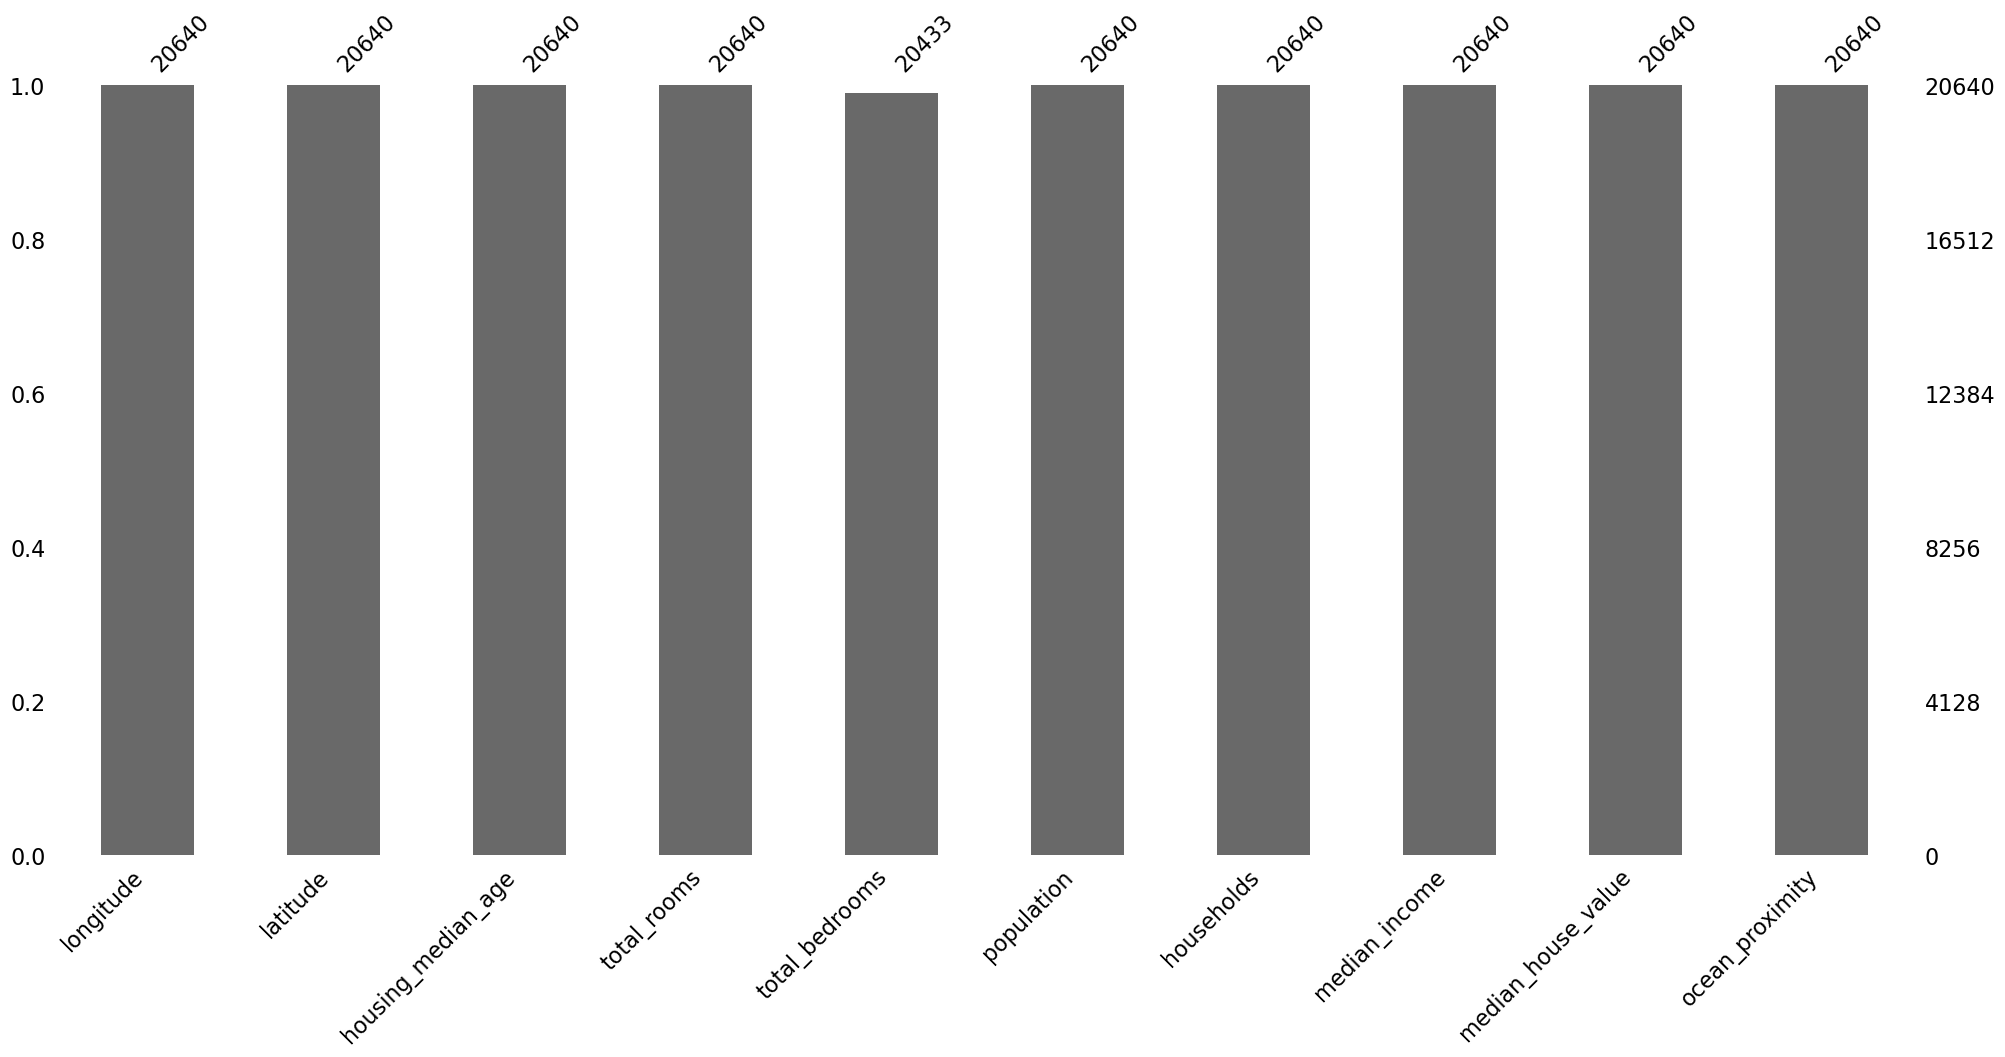

In [12]:
msno.bar(df_housing)

# <a id = '3'>3. Data Manipulation </a>

In [6]:
# to remove < form <1H OCEAN using replace method ( old value, new value ) 
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
# to check if it working or not
print(df_housing['ocean_proximity'].unique())  # using pandas
# it working 
np.unique(df_housing['ocean_proximity']) # using numpy

['NEAR BAY' '1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

comment:<br> will fill in nuls cells in the data processing stage 

# <a id = '4'>4. Exploratory Data Analysis EDA </a>

# <a id = '4.1'>4.1 univariate visualization </a>

### <a id = '4.1.1'>4.1.1 univariate visualization numerical columns </a>

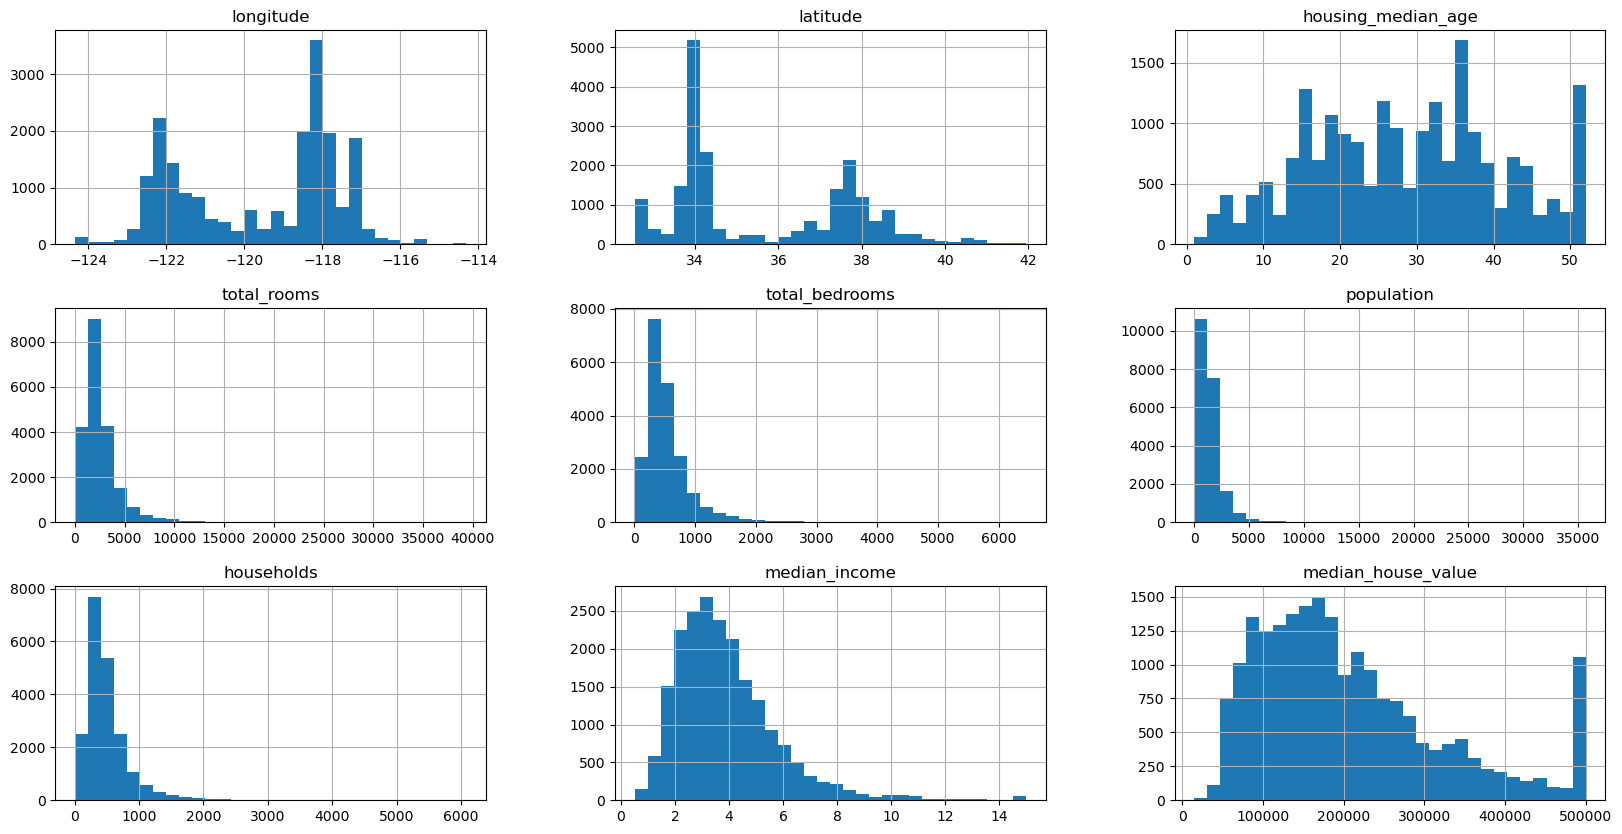

In [14]:
## Histogram Distribution of Numerical Variables in Dataset
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

C:\Users\hmohammad\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

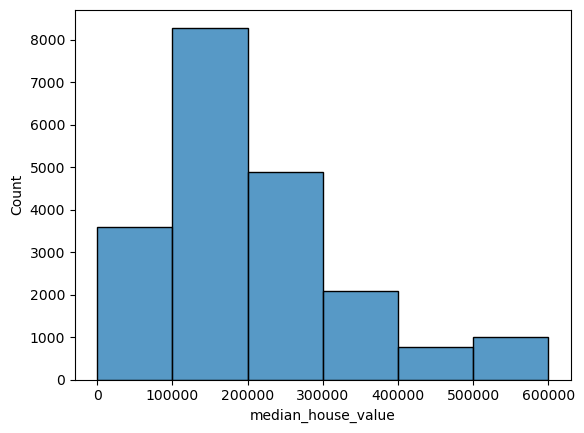

In [15]:
# to know the range of prices 
sns.histplot(df_housing , x= 'median_house_value' ,bins=[ 0,100000, 200000, 300000, 400000, 500000, 600000] )

### <a id = '4.1.2'>4.1.2 univariate visualization categorcal columns </a>

ocean_proximity
1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
##############################
Index(['1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')
##############################
[9136 6551 2658 2290    5]
##############################
20640
##############################
Index(['1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')


<Axes: xlabel='ocean_proximity', ylabel='count'>

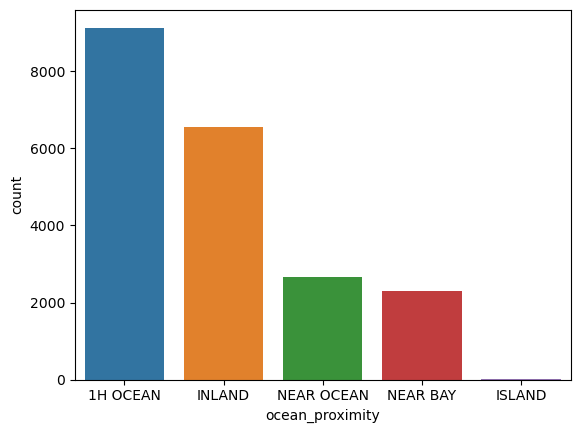

In [16]:
# can make an order using code instead of list 
print(df_housing["ocean_proximity"].value_counts())
print('##############################')
print(df_housing["ocean_proximity"].value_counts().keys())
print('##############################')
print(df_housing["ocean_proximity"].value_counts().values)
print('##############################')
print(df_housing["ocean_proximity"].value_counts().sum())
print('##############################')
print(df_housing["ocean_proximity"].value_counts().index)
sns.countplot(x = 'ocean_proximity', data = df_housing, order=df_housing["ocean_proximity"].value_counts().keys())
# above line could use index instead of keys()==>  df_housing, order=df_housing["ocean_proximity"].value_counts().index())

<Axes: xlabel='ocean_proximity'>

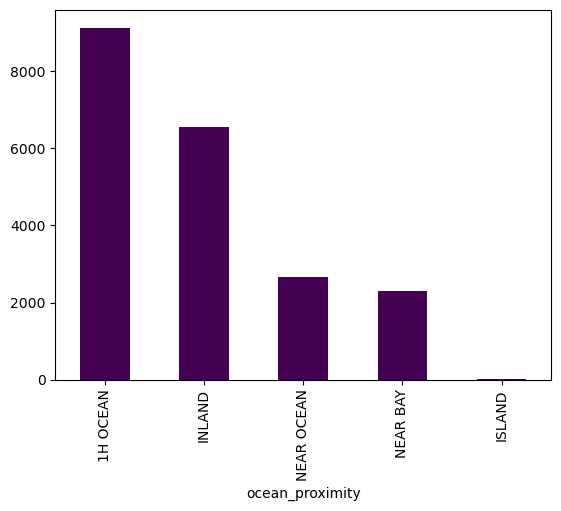

In [17]:
# using pandas
df_housing["ocean_proximity"].value_counts().plot(kind='bar', cmap='viridis')

# Comment: It seems that the (<1H ocean) is about the half of the dataset 

# <a id = '4.2'>4.2  bivariate visualization </a>


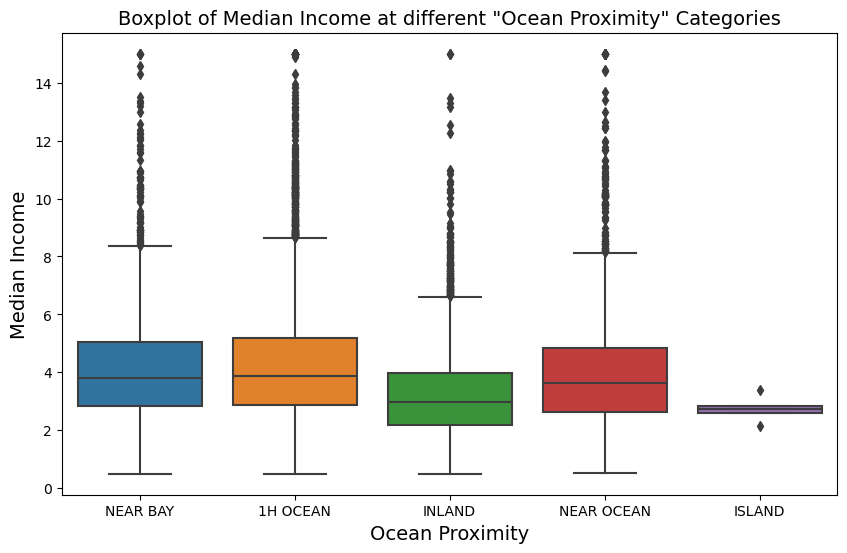

In [18]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

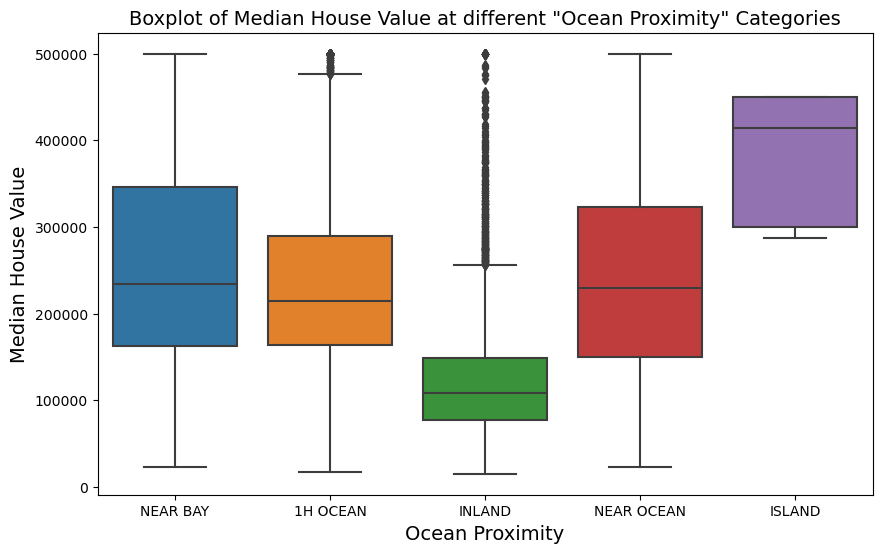

In [19]:
## Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

C:\Users\hmohammad\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

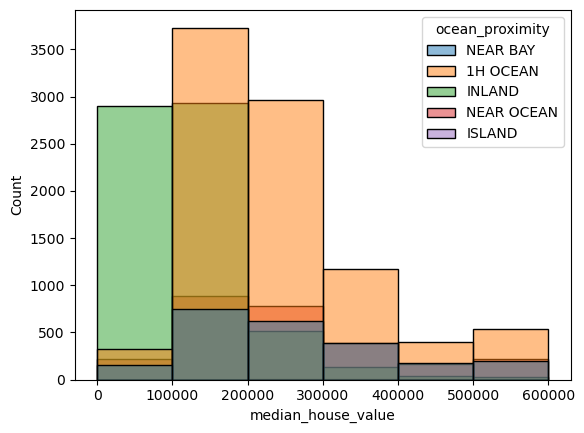

In [20]:
sns.histplot(df_housing, x='median_house_value', hue ='ocean_proximity',bins=[0,100000, 200000, 300000, 400000, 500000, 600000])

In [21]:
# comment : the INLAND prices is the lowest , almost of 1H OCEAN prices between 200k -300k

# <a id = '4.3'>4.3 multivariate visualization </a>

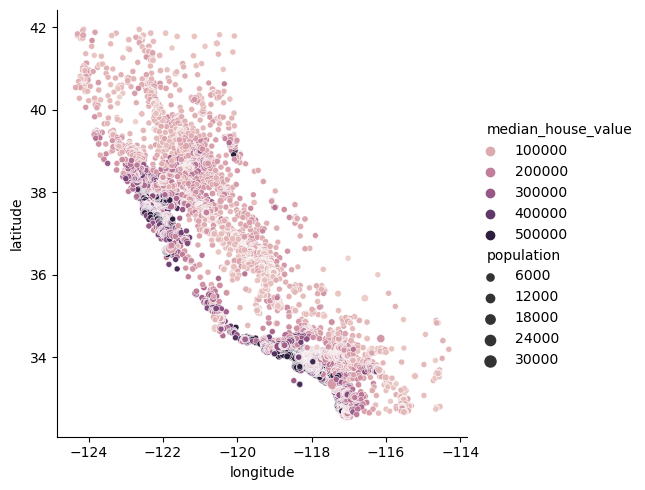

In [22]:
sns.relplot(x= 'longitude' , y= 'latitude',  data= df_housing,
            hue='median_house_value' , size = 'population')

# <a id = '4.4'>4.4 Correlation Matrix </a>

In [23]:
cr = df_housing.corr(numeric_only=True)
cr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [24]:
df_housing.corr(numeric_only= True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Comment: the most correlated Feature with target is (median_income) , and feature like (households & population) are less correlated

# <a id = '5'>5. Data preprocessing </a>

# <a id = '5.1'>5.1 features extraction </a>

In [7]:
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [8]:
df_housing.corr(numeric_only= True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

# <a id = '5.2'>5.2 features selection </a>

In [9]:
## Split the Whole dataset to features and target
y = df_housing.pop('median_house_value')  ## target

In [10]:
y.shape

(20640,)

In [11]:
X = df_housing
X.shape

(20640, 12)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
# ## check shape
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (17544, 12)
y_train shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


In [36]:
# original data was 10 columns ( 10 - 1 the target  = 9 ) --> 9 + 3 new added col = 12 

# note
## fristly split the data then do the preprocissing to prevent the model information leakage 

In [13]:
y_train

4602     275000.0
6978     238500.0
16415    158300.0
2549      70500.0
11025    222300.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 17544, dtype: float64

# note :
## the the index of the 1st instance is 4602

In [14]:
num_cols = df_housing.select_dtypes(include=(np.number))
num_cols = num_cols.columns  # to get just a list of columns names not columns it self 
categ_cols = df_housing.select_dtypes(include=('object'))
categ_cols = categ_cols.columns   # to get just a list of columns names not columns it self 

In [15]:
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedroms_per_rooms', 'population_per_household'],
      dtype='object')

In [16]:
categ_cols

Index(['ocean_proximity'], dtype='object')

# pipeline

In [17]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)

X_test_final = total_pipeline.transform(X_test)            

In [18]:
X_train_final

array([[ 0.65402254, -0.74562661, -1.3152842 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77369361, -0.78306685,  0.27101546, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83687948,  1.04682484,  1.06416529, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5991733 , -0.75498667,  0.58827539, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18592009,  0.90642394, -1.07733925, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41528963,  0.99534451,  1.85731512, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
X_train_final.shape

(17544, 16)

In [37]:
# 12 col - 1 object col  = 11  --> 11 + 5 new added col ( form OHE for the ocean_proximity ) = 16 col

In [19]:
X_test_final

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06065351, -0.23550335,  0.1123855 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.42526222,  1.0093846 ,  1.85731512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.        ,
         0.        ,  0.        ]])

# <a id = '6'>6. Model Building </a> 

metrics = RMSE

# <a id = '6.1'>6.1 baseline model</a>

## LINEAR REGRESSION MODEL

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [21]:
y_pred_lin_reg = lin_reg.predict(X_train_final)

In [22]:
lin_reg.coef_, lin_reg.intercept_  

(array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
          8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
          6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
        -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772]),
 239967.5707416455)

In [23]:
lin_reg.score(X_train_final, y_train)

0.6577509701605881

In [24]:
print(f' ypredict using lin_reg is         {y_pred_lin_reg[0]} ')
print(f' real y  is                        {y_train[4602]} ') # 1st y after suffiling 


 ypredict using lin_reg is         184114.33966863397 
 real y  is                        275000.0 


In [25]:
def cross_val(model, X_train, y_train):
    # some models not working with decision_function method so put if condition to change the method to predict_proba, so use paramter case
    model.fit(X_train, y_train)
    y_model_predict = model.predict(X_train)
    
    ## Check scores of this Model (RMSE) using (cross_val_score)
    rmse_scores = cross_val_score(estimator= model, X=X_train, y=y_train, 
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
    rmse_scores = -1 * rmse_scores  ## we want it positive
    rmse_scores = np.sqrt(rmse_scores)
    print(f'RMSE Scores Using {model} --- {np.round(rmse_scores, 4)}')
    print(f'Mean of RMSE Scores Using {model} --- {rmse_scores.mean():.4f}')

    print('****'*30)

    ## Get Prediction using (cross_val_predict)
    y_pred = cross_val_predict(estimator= model, X=X_train, y=y_train, cv=5, method='predict', n_jobs=-1)
    ## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
    ## take care of this point --> don't use .predict when you are using (crossValidation)
    rmse_pred = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f'RMSE Using (mean_squared_error) method with {model} --- {rmse_pred:.4f}')  ## almost the same result :D
    print(f' ypredict using (cross_val)  with  {model} is    {y_pred[0]} ')
    print(f' ypredict using ( model.predict) {model} is         {y_model_predict[0]} ')
    print(f' real y  is                        {y_train[4602]} ') # 1st y after suffiling 


In [26]:
cross_val(lin_reg, X_train_final, y_train)

RMSE Scores Using LinearRegression() --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression() --- 67880.1426
************************************************************************************************************************
RMSE Using (mean_squared_error) method with LinearRegression() --- 67898.8887
 ypredict using (cross_val)  with  LinearRegression() is    184295.232444191 
 ypredict using ( model.predict) LinearRegression() is         184114.33966863397 
 real y  is                        275000.0 


# <a id = '6.2'>6.2 model 2 </a>

### `SGDRegression`

In [109]:
sgd_reg = SGDRegressor(penalty='l2', alpha=.0001, tol=0.001, eta0=0.001, shuffle=True, max_iter=10000)  

In [110]:
cross_val(sgd_reg, X_train_final, y_train)

RMSE Scores Using SGDRegressor(eta0=0.001, max_iter=10000) --- [66708.6585 69268.5504 66607.2514 67025.7226 70363.0647]
Mean of RMSE Scores Using SGDRegressor(eta0=0.001, max_iter=10000) --- 67994.6495
************************************************************************************************************************
RMSE Using (mean_squared_error) method with SGDRegressor(eta0=0.001, max_iter=10000) --- 68009.4444
 ypredict using (cross_val)  with  SGDRegressor(eta0=0.001, max_iter=10000) is    180747.2452645537 
 ypredict using ( model.predict) SGDRegressor(eta0=0.001, max_iter=10000) is         181526.75238977058 
 real y  is                        275000.0 


# <a id = '6.3'>6.3 model 3 </a>

Ridge

In [111]:
ridge_reg = Ridge(alpha=0.9, solver='cholesky')

In [114]:
cross_val(ridge_reg , X_train_final, y_train)

RMSE Scores Using Ridge(alpha=0.9, solver='cholesky') --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge(alpha=0.9, solver='cholesky') --- 67880.2192
************************************************************************************************************************
RMSE Using (mean_squared_error) method with Ridge(alpha=0.9, solver='cholesky') --- 67898.9471
 ypredict using (cross_val)  with  Ridge(alpha=0.9, solver='cholesky') is    184251.80264792242 
 ypredict using ( model.predict) Ridge(alpha=0.9, solver='cholesky') is         184106.61436933157 
 real y  is                        275000.0 


# <a id = '6.4'>6.4 model 4 </a>

# lasso 

In [115]:
lasso_reg = Lasso(alpha=1, max_iter=100000)

In [116]:
cross_val(lasso_reg , X_train_final, y_train)

RMSE Scores Using Lasso(alpha=1, max_iter=100000) --- [66469.6897 69222.98   66340.5704 67045.4226 70321.1988]
Mean of RMSE Scores Using Lasso(alpha=1, max_iter=100000) --- 67879.9723
************************************************************************************************************************
RMSE Using (mean_squared_error) method with Lasso(alpha=1, max_iter=100000) --- 67898.7130
 ypredict using (cross_val)  with  Lasso(alpha=1, max_iter=100000) is    184281.5949719158 
 ypredict using ( model.predict) Lasso(alpha=1, max_iter=100000) is         184103.94678047736 
 real y  is                        275000.0 


# <a id = '6.5'>6.5 model 5 </a>

# ElasticNet

In [117]:
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [118]:
cross_val(elastic_reg , X_train_final, y_train)

RMSE Scores Using ElasticNet(alpha=0.1) --- [67724.5436 69894.5587 67623.9269 67650.3806 70012.8952]
Mean of RMSE Scores Using ElasticNet(alpha=0.1) --- 68581.2610
************************************************************************************************************************
RMSE Using (mean_squared_error) method with ElasticNet(alpha=0.1) --- 68590.3520
 ypredict using (cross_val)  with  ElasticNet(alpha=0.1) is    168985.68193672865 
 ypredict using ( model.predict) ElasticNet(alpha=0.1) is         169330.54979248758 
 real y  is                        275000.0 


# <a id = '6.6'>6.6 model 6 </a>

# Liner Regrission with PolynomialFeatures

In [119]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train_final)
X_train_poly.shape

(17544, 152)

In [120]:
lin_reg_poly = LinearRegression()

In [122]:
lin_reg_poly.score(X_train_poly, y_train)

0.7352024234519975

In [124]:
cross_val(lin_reg_poly , X_train_poly, y_train)

RMSE Scores Using LinearRegression() --- [9.02018858e+12 1.41429249e+05 1.43399799e+08 1.33585113e+12
 2.93051843e+11]
Mean of RMSE Scores Using LinearRegression() --- 2129847019312.5403
************************************************************************************************************************
RMSE Using (mean_squared_error) method with LinearRegression() --- 4080169103525.0645
 ypredict using (cross_val)  with  LinearRegression() is    322202.90625 
 ypredict using ( model.predict) LinearRegression() is         313218.28125 
 real y  is                        275000.0 


# <a id = '6.7'>6.7 model 7 </a>

# Random Forest 

In [125]:
random_forest_reg = RandomForestRegressor(n_estimators=200, max_depth= 8, random_state=42, max_samples=0.8)

In [126]:
cross_val(random_forest_reg  , X_train_poly, y_train)

RMSE Scores Using RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=200,
                      random_state=42) --- [54031.0053 55850.1906 54500.8912 52725.1658 54938.0345]
Mean of RMSE Scores Using RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=200,
                      random_state=42) --- 54409.0575
************************************************************************************************************************
RMSE Using (mean_squared_error) method with RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=200,
                      random_state=42) --- 54418.8479
 ypredict using (cross_val)  with  RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=200,
                      random_state=42) is    164674.20647837778 
 ypredict using ( model.predict) RandomForestRegressor(max_depth=8, max_samples=0.8, n_estimators=200,
                      random_state=42) is         173864.32302574083 
 real y  is                   

In [128]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=random_forest_reg , param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time= 1.0min
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=  58.5s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=  57.9s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=  55.5s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=  56.1s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time= 1.3min
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time= 1.3min
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time= 1.3min
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time= 1.3min
[C

[CV 5/5] END max_depth=4, max_samples=1, n_estimators=150;, score=-13489042553.576 total time=   0.1s
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2384896179.131 total time= 2.5min
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2759362249.987 total time= 2.3min
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2648709690.778 total time= 2.1min
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2414566168.514 total time= 2.2min
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2539287365.132 total time= 2.1min
[CV 1/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-2969350121.079 total time=  55.0s
[CV 2/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3285813274.305 total time=  55.8s
[CV 3/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3182203195.062 total time= 1.0min
[CV 4/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=8, max_samples=0.8,
                                                   n_estimators=200,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [129]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}
best_forest --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42)


In [131]:
cross_val(best_forest  , X_train_final, y_train)

RMSE Scores Using RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42) --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
Mean of RMSE Scores Using RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42) --- 50233.0500
************************************************************************************************************************
RMSE Using (mean_squared_error) method with RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42) --- 50252.9752
 ypredict using (cross_val)  with  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42) is    204483.04740714043 
 ypredict using ( model.predict) RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42) is         249903.33162003383 
 real y  is              

# <a id = '6.8'>6.8 model 8 </a>

# xgboost

In [27]:
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)

In [28]:
cross_val(xgb_reg  , X_train_final, y_train)

RMSE Scores Using XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) --- [46257.3372 48079.2801 48091.8238 45795.9642 48237.5764]
Mean of RMSE Scores Using XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=Non

In [29]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [30]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [139]:
cross_val(best_xgb  , X_train_final, y_train)

RMSE Scores Using XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) --- [45156.6241 47290.7814 46324.3726 44948.1235 46516.5659]
Mean of RMSE Scores Using XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=Non

In [31]:
print(best_xgb.feature_importances_)

[0.01470914 0.01859779 0.01568086 0.00632132 0.00851065 0.00687859
 0.0083977  0.16141541 0.01004706 0.00895971 0.04187596 0.00809718
 0.61859393 0.03846833 0.01417026 0.0192762 ]


In [34]:
len(best_xgb.feature_importances_)

16

In [40]:
X_train_final.shape

(17544, 16)

In [47]:
# 11 columns for num_cols and 5 for catigorical colunmns

<BarContainer object of 11 artists>

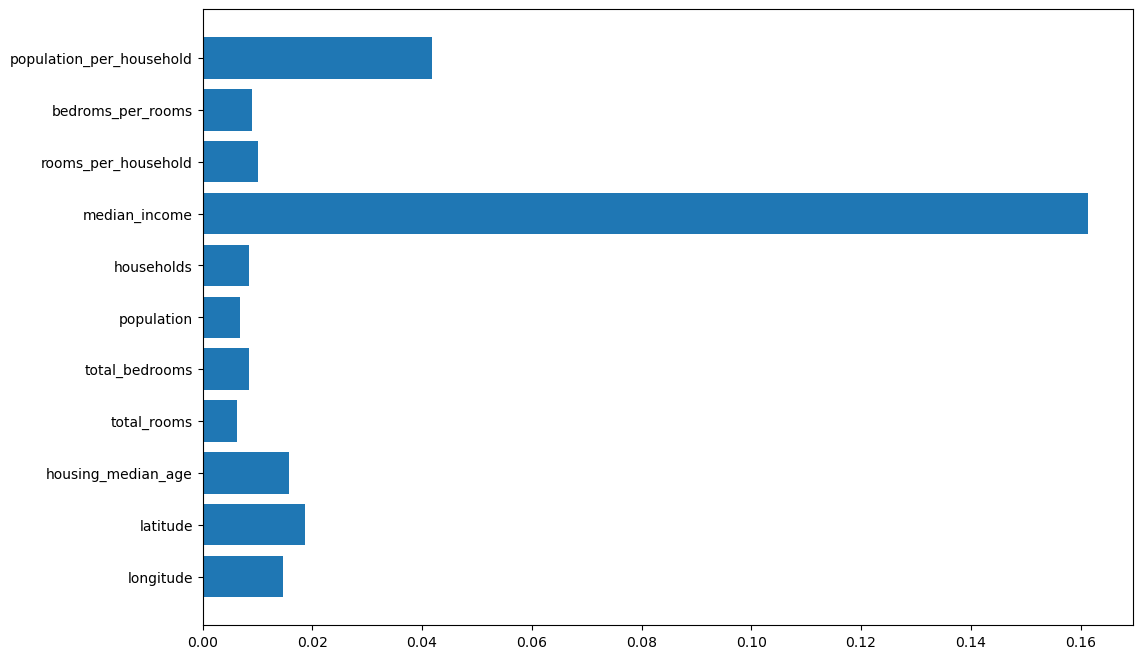

In [46]:
plt.figure(figsize=(12, 8))
plt.barh(y = num_cols  , width= best_xgb.feature_importances_[:11])


# the best features is the median_income 

# <a id = '7'>7  best model </a>

# xgbost is the best model with ........

# <a id = '8'>8 inference </a>

In [51]:
y_predict_test = best_xgb.predict(X_test_final)
rmse_pred_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
rmse_pred_test

44880.94808999626

# <a id = '9'>9 download the model </a>

In [54]:
# download or save to pc
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [55]:
# uplaod the saved model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
# inference the loaded model
y_predict_test_loaded_model = loaded_model.predict(X_test_final)
rmse_pred_test_loaded_model = np.sqrt(mean_squared_error(y_test, y_predict_test_loaded_model))
rmse_pred_test_loaded_model

44880.94808999626

# DONE BY : Hisham Hindawy 